In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'errorbar.capsize': 2})

forecast = pd.read_csv('preds-2.csv')
forecast = forecast.drop(['Unnamed: 0'],axis=1)
forecast

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,6_Alphabet City,6_Alphabet City_lower,6_Alphabet City_upper,6_Battery Park,...,seasonalities,seasonalities_lower,seasonalities_upper,snow,snow_lower,snow_upper,weekly,weekly_lower,weekly_upper,yhat
0,2015-06-01 00:03:00,7.080028,7.080028,7.080028,12.072952,42.012763,0.0,0.0,0.0,0.0,...,-0.056280,-0.056280,-0.056280,-0.017988,-0.017988,-0.017988,-2.039694,-2.039694,-2.039694,26.846246
1,2015-06-01 00:03:00,7.080028,7.080028,7.080028,-9.012755,20.027675,0.0,0.0,0.0,0.0,...,-0.056280,-0.056280,-0.056280,-0.017988,-0.017988,-0.017988,-2.039694,-2.039694,-2.039694,5.629360
2,2015-06-01 00:04:00,7.080032,7.080032,7.080032,15.096187,44.793276,0.0,0.0,0.0,0.0,...,-0.102479,-0.102479,-0.102479,-0.017988,-0.017988,-0.017988,-2.041497,-2.041497,-2.041497,29.816164
3,2015-06-01 00:04:00,7.080032,7.080032,7.080032,1.876787,32.195817,0.0,0.0,0.0,0.0,...,-0.102479,-0.102479,-0.102479,-0.017988,-0.017988,-0.017988,-2.041497,-2.041497,-2.041497,17.397777
4,2015-06-01 00:05:00,7.080037,7.080037,7.080037,-4.413807,25.117093,0.0,0.0,0.0,0.0,...,-0.148941,-0.148941,-0.148941,-0.017988,-0.017988,-0.017988,-2.043298,-2.043298,-2.043298,10.082351
5,2015-06-01 00:06:00,7.080041,7.080041,7.080041,-8.812009,21.255010,0.0,0.0,0.0,0.0,...,-0.195664,-0.195664,-0.195664,-0.017988,-0.017988,-0.017988,-2.045095,-2.045095,-2.045095,6.968273
6,2015-06-01 00:06:00,7.080041,7.080041,7.080041,4.849549,33.079674,0.0,0.0,0.0,0.0,...,-0.195664,-0.195664,-0.195664,-0.017988,-0.017988,-0.017988,-2.045095,-2.045095,-2.045095,19.055459
7,2015-06-01 00:06:00,7.080041,7.080041,7.080041,-13.708561,15.494427,0.0,0.0,0.0,0.0,...,-0.195664,-0.195664,-0.195664,-0.017988,-0.017988,-0.017988,-2.045095,-2.045095,-2.045095,1.617532
8,2015-06-01 00:06:00,7.080041,7.080041,7.080041,0.679780,31.727737,0.0,0.0,0.0,0.0,...,-0.195664,-0.195664,-0.195664,-0.017988,-0.017988,-0.017988,-2.045095,-2.045095,-2.045095,15.822073
9,2015-06-01 00:06:00,7.080041,7.080041,7.080041,20.633840,50.192245,0.0,0.0,0.0,0.0,...,-0.195664,-0.195664,-0.195664,-0.017988,-0.017988,-0.017988,-2.045095,-2.045095,-2.045095,35.333904


In [4]:
original = pd.read_csv('final-2.csv').tail(240522).reset_index(drop=True)
original = original.drop(['Unnamed: 0'],axis=1)
original

,ds,y,7_Allerton/Pelham Gardens,7_Bedford Park,7_Belmont,7_Bronx Park,7_Bronxdale,7_City Island,7_Claremont/Bathgate,7_Co-Op City,...,7_West Brighton,7_Westerleigh,Temperature,Humidity,Pressure,snow,Wind Direction,Wind Speed,rain,Holiday
0,2015-06-01 00:03:00,4,0,0,0,0,0,0,0,0,...,0,0,292.36,83,1016,0,120,6,3,0
1,2015-06-01 00:03:00,2,0,0,0,0,0,0,0,0,...,0,0,292.36,83,1016,0,120,6,3,0
2,2015-06-01 00:04:00,9,0,0,0,0,0,0,0,0,...,0,0,292.36,83,1016,0,120,6,3,0
3,2015-06-01 00:04:00,1,0,0,0,0,0,0,0,0,...,0,0,292.36,83,1016,0,120,6,3,0
4,2015-06-01 00:05:00,10,0,0,0,0,0,0,0,0,...,0,0,292.36,83,1016,0,120,6,3,0
5,2015-06-01 00:06:00,4,0,0,0,0,0,0,0,0,...,0,0,292.36,83,1016,0,120,6,3,0
6,2015-06-01 00:06:00,14,0,0,0,0,0,0,0,0,...,0,0,292.36,83,1016,0,120,6,3,0
7,2015-06-01 00:06:00,1,0,0,0,0,0,0,0,0,...,0,0,292.36,83,1016,0,120,6,3,0
8,2015-06-01 00:06:00,5,0,0,0,0,0,0,0,0,...,0,0,292.36,83,1016,0,120,6,3,0
9,2015-06-01 00:06:00,87,0,0,0,0,0,0,0,0,...,0,0,292.36,83,1016,0,120,6,3,0


In [5]:
tmp = list(forecast.columns.values)
areas = []
for area in tmp:
    if not(area.endswith('lower') or area.endswith('upper')):
        areas.append(area)

areas.remove('ds')
areas.remove('trend')
areas.remove('Holiday')
areas.remove('Humidity')
areas.remove('Pressure')
areas.remove('Temperature')
areas.remove('Wind Direction')
areas.remove('Wind Speed')
areas.remove('daily')
areas.remove('extra_regressors')
areas.remove('rain')
areas.remove('seasonal')
areas.remove('seasonalities')
areas.remove('snow')
areas.remove('weekly')
areas.remove('yhat')

areas

['6_Alphabet City',
 '6_Battery Park',
 '6_Battery Park City',
 '6_Bloomingdale',
 '6_Central Harlem',
 '6_Central Harlem North',
 '6_Central Park',
 '6_Chinatown',
 '6_Clinton East',
 '6_Clinton West',
 '6_East Chelsea',
 '6_East Harlem North',
 '6_East Harlem South',
 '6_East Village',
 '6_Financial District North',
 '6_Financial District South',
 '6_Flatiron',
 '6_Garment District',
 '6_Governors Island/Ellis Island/Liberty Island',
 '6_Gramercy',
 '6_Greenwich Village North',
 '6_Greenwich Village South',
 '6_Hamilton Heights',
 '6_Highbridge Park',
 '6_Hudson Sq',
 '6_Inwood',
 '6_Inwood Hill Park',
 '6_Kips Bay',
 '6_Lenox Hill East',
 '6_Lenox Hill West',
 '6_Lincoln Square East',
 '6_Lincoln Square West',
 '6_Little Italy/NoLiTa',
 '6_Lower East Side',
 '6_Manhattan Beach',
 '6_Manhattan Valley',
 '6_Manhattanville',
 '6_Marble Hill',
 '6_Meatpacking/West Village West',
 '6_Midtown Center',
 '6_Midtown East',
 '6_Midtown North',
 '6_Midtown South',
 '6_Morningside Heights',
 '6

In [59]:
#get entries with specific date 
original['ds'] = pd.to_datetime(original['ds'])  
mask = (forecast['ds'] > '2015-06-16') & (forecast['ds'] < '2015-06-17')
mask_og = (original['ds'] > '2015-06-16') & (original['ds'] < '2015-06-17')
spec_date = forecast.loc[mask]
spec_date_og = original.loc[mask_og]
spec_date

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,6_Alphabet City,6_Alphabet City_lower,6_Alphabet City_upper,6_Battery Park,...,seasonalities,seasonalities_lower,seasonalities_upper,snow,snow_lower,snow_upper,weekly,weekly_lower,weekly_upper,yhat
119696,2015-06-16 00:00:00,7.172120,3.202113,11.216902,20.974353,51.297146,0.0,0.0,0.0,0.0,...,0.226656,0.226656,0.226656,-0.017988,-0.017988,-0.017988,-1.888355,-1.888355,-1.888355,35.013663
119697,2015-06-16 00:00:00,7.172120,3.202113,11.216902,-1.872854,28.964360,0.0,0.0,0.0,0.0,...,0.226656,0.226656,0.226656,-0.017988,-0.017988,-0.017988,-1.888355,-1.888355,-1.888355,13.532078
119698,2015-06-16 00:00:00,7.172120,3.202113,11.216902,21.405149,51.168965,0.0,0.0,0.0,0.0,...,0.226656,0.226656,0.226656,-0.017988,-0.017988,-0.017988,-1.888355,-1.888355,-1.888355,37.004913
119699,2015-06-16 00:00:00,7.172120,3.202113,11.216902,16.215060,47.867650,0.0,0.0,0.0,0.0,...,0.226656,0.226656,0.226656,-0.017988,-0.017988,-0.017988,-1.888355,-1.888355,-1.888355,31.867730
119700,2015-06-16 00:00:00,7.172120,3.202113,11.216902,2.763359,33.943982,0.0,0.0,0.0,0.0,...,0.226656,0.226656,0.226656,-0.017988,-0.017988,-0.017988,-1.888355,-1.888355,-1.888355,17.031232
119701,2015-06-16 00:00:00,7.172120,3.202113,11.216902,-7.405410,23.462758,0.0,0.0,0.0,0.0,...,0.226656,0.226656,0.226656,-0.017988,-0.017988,-0.017988,-1.888355,-1.888355,-1.888355,7.973000
119702,2015-06-16 00:00:00,7.172120,3.202113,11.216902,-0.814763,30.331506,0.0,0.0,0.0,0.0,...,0.226656,0.226656,0.226656,-0.017988,-0.017988,-0.017988,-1.888355,-1.888355,-1.888355,14.855850
119703,2015-06-16 00:00:00,7.172120,3.202113,11.216902,-4.286720,26.729593,0.0,0.0,0.0,0.0,...,0.226656,0.226656,0.226656,-0.017988,-0.017988,-0.017988,-1.888355,-1.888355,-1.888355,11.904256
119704,2015-06-16 00:01:00,7.172124,3.201898,11.217224,-4.389307,26.153297,0.0,0.0,0.0,0.0,...,0.184290,0.184290,0.184290,-0.017988,-0.017988,-0.017988,-1.887120,-1.887120,-1.887120,10.913635
119705,2015-06-16 00:01:00,7.172124,3.201898,11.217224,0.185053,32.455408,0.0,0.0,0.0,0.0,...,0.184290,0.184290,0.184290,-0.017988,-0.017988,-0.017988,-1.887120,-1.887120,-1.887120,16.365677


In [60]:
spec_date_og

,ds,y,7_Allerton/Pelham Gardens,7_Bedford Park,7_Belmont,7_Bronx Park,7_Bronxdale,7_City Island,7_Claremont/Bathgate,7_Co-Op City,...,7_West Brighton,7_Westerleigh,Temperature,Humidity,Pressure,snow,Wind Direction,Wind Speed,rain,Holiday
119704,2015-06-16 00:01:00,9,0,0,0,0,0,0,0,0,...,0,0,293.39,100,1014,0,40,5,4,0
119705,2015-06-16 00:01:00,2,0,0,0,0,0,0,0,0,...,0,0,293.39,100,1014,0,40,5,4,0
119706,2015-06-16 00:01:00,1,0,0,0,0,0,0,0,0,...,0,0,293.39,100,1014,0,40,5,4,0
119707,2015-06-16 00:01:00,1,0,0,0,0,0,0,0,0,...,0,0,293.39,100,1014,0,40,5,4,0
119708,2015-06-16 00:01:00,1,0,0,0,0,0,0,0,0,...,0,0,293.39,100,1014,0,40,5,4,0
119709,2015-06-16 00:01:00,1,0,0,0,0,0,0,0,0,...,0,0,293.39,100,1014,0,40,5,4,0
119710,2015-06-16 00:02:00,11,0,0,0,0,0,0,0,0,...,0,0,293.39,100,1014,0,40,5,4,0
119711,2015-06-16 00:02:00,2,0,0,0,0,0,0,0,0,...,0,0,293.39,100,1014,0,40,5,4,0
119712,2015-06-16 00:02:00,6,0,0,0,0,0,0,0,0,...,0,0,293.39,100,1014,0,40,5,4,0
119713,2015-06-16 00:02:00,2,0,0,0,0,0,0,0,0,...,0,0,293.39,100,1014,0,40,5,4,0


In [61]:
#getting specific time
index = pd.DatetimeIndex(spec_date['ds'])
index_og = pd.DatetimeIndex(spec_date_og['ds'])
spec_time = spec_date.iloc[index.indexer_between_time('22:00','22:30')]
spec_time_og = spec_date_og.iloc[index_og.indexer_between_time('22:00','22:30')]
spec_time

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,6_Alphabet City,6_Alphabet City_lower,6_Alphabet City_upper,6_Battery Park,...,seasonalities,seasonalities_lower,seasonalities_upper,snow,snow_lower,snow_upper,weekly,weekly_lower,weekly_upper,yhat
126719,2015-06-16 22:00:00,7.177748,2.806881,11.684011,-8.737605,23.367124,0.0,0.0,0.0,0.0,...,4.776867,4.776867,4.776867,-0.017988,-0.017988,-0.017988,-0.859473,-0.859473,-0.859473,6.549480
126720,2015-06-16 22:00:00,7.177748,2.806881,11.684011,-5.959786,24.642052,0.0,0.0,0.0,0.0,...,4.776867,4.776867,4.776867,-0.017988,-0.017988,-0.017988,-0.859473,-0.859473,-0.859473,8.739403
126721,2015-06-16 22:00:00,7.177748,2.806881,11.684011,-11.278860,20.744783,0.0,0.0,0.0,0.0,...,4.776867,4.776867,4.776867,-0.017988,-0.017988,-0.017988,-0.859473,-0.859473,-0.859473,5.653046
126722,2015-06-16 22:00:00,7.177748,2.806881,11.684011,24.131030,53.671246,0.0,0.0,0.0,0.0,...,4.776867,4.776867,4.776867,-0.017988,-0.017988,-0.017988,-0.859473,-0.859473,-0.859473,39.359647
126723,2015-06-16 22:00:00,7.177748,2.806881,11.684011,-9.011798,21.146571,0.0,0.0,0.0,0.0,...,4.776867,4.776867,4.776867,-0.017988,-0.017988,-0.017988,-0.859473,-0.859473,-0.859473,6.839771
126724,2015-06-16 22:00:00,7.177748,2.806881,11.684011,-7.433166,24.977491,0.0,0.0,0.0,0.0,...,4.776867,4.776867,4.776867,-0.017988,-0.017988,-0.017988,-0.859473,-0.859473,-0.859473,8.755082
126725,2015-06-16 22:00:00,7.177748,2.806881,11.684011,-5.207383,27.643072,0.0,0.0,0.0,0.0,...,4.776867,4.776867,4.776867,-0.017988,-0.017988,-0.017988,-0.859473,-0.859473,-0.859473,10.902652
126726,2015-06-16 22:01:00,7.177753,2.806420,11.684292,-0.203289,30.499205,0.0,0.0,0.0,0.0,...,4.758894,4.758894,4.758894,-0.017988,-0.017988,-0.017988,-0.859178,-0.859178,-0.859178,14.446898
126727,2015-06-16 22:01:00,7.177753,2.806420,11.684292,7.167834,38.262573,0.0,0.0,0.0,0.0,...,4.758894,4.758894,4.758894,-0.017988,-0.017988,-0.017988,-0.859178,-0.859178,-0.859178,22.710707
126728,2015-06-16 22:01:00,7.177753,2.806420,11.684292,0.454625,30.331100,0.0,0.0,0.0,0.0,...,4.758894,4.758894,4.758894,-0.017988,-0.017988,-0.017988,-0.859178,-0.859178,-0.859178,14.890720


In [62]:
spec_time_og

,ds,y,7_Allerton/Pelham Gardens,7_Bedford Park,7_Belmont,7_Bronx Park,7_Bronxdale,7_City Island,7_Claremont/Bathgate,7_Co-Op City,...,7_West Brighton,7_Westerleigh,Temperature,Humidity,Pressure,snow,Wind Direction,Wind Speed,rain,Holiday
126719,2015-06-16 22:00:00,10,0,0,0,0,0,0,0,0,...,0,0,296.64,83,1011,0,40,3,0,0
126720,2015-06-16 22:00:00,3,0,0,0,0,0,0,0,0,...,0,0,296.64,83,1011,0,40,3,0,0
126721,2015-06-16 22:00:00,1,0,0,0,0,0,0,0,0,...,0,0,296.64,83,1011,0,40,3,0,0
126722,2015-06-16 22:00:00,20,0,0,0,0,0,0,0,0,...,0,0,296.64,83,1011,0,40,3,0,0
126723,2015-06-16 22:00:00,1,0,0,0,0,0,0,0,0,...,0,0,296.64,83,1011,0,40,3,0,0
126724,2015-06-16 22:00:00,86,0,0,0,0,0,0,0,0,...,0,0,296.64,83,1011,0,40,3,0,0
126725,2015-06-16 22:00:00,2,0,0,0,0,0,0,0,0,...,0,0,296.64,83,1011,0,40,3,0,0
126726,2015-06-16 22:01:00,11,0,0,0,0,0,0,0,0,...,0,0,296.64,83,1011,0,40,3,0,0
126727,2015-06-16 22:01:00,17,0,0,0,0,0,0,0,0,...,0,0,296.64,83,1011,0,40,3,0,0
126728,2015-06-16 22:01:00,7,0,0,0,0,0,0,0,0,...,0,0,296.64,83,1011,0,40,3,0,0


In [66]:
x = []
y = []
yhat = []
yhat_upper = []
yhat_lower = []

for area in areas:
    p = spec_time.loc[spec_time[area] != 0.0]
    o = spec_time_og.loc[spec_time_og[area] != 0]
    if p.empty:
        continue
    yhat.append(p.iloc[0]['yhat'])
    yhat_upper.append(p.iloc[0]['yhat_upper'])
    yhat_lower.append(p.iloc[0]['yhat_lower'])
    y.append(o.iloc[0]['y'])
    x.append(area)


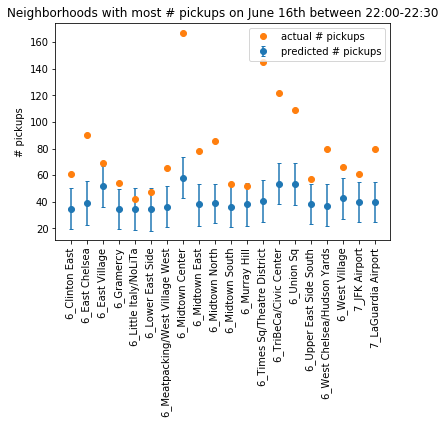

In [67]:

x = np.array(x)
y = np.array(y)
yhat = np.array(yhat)
yhat[yhat < 0] = 0
yhat_upper = np.array(yhat_upper)-yhat
yhat_lower = np.array(yhat_lower)
yhat_lower[yhat_lower < 0] = 0
yhat_lower = yhat-yhat_lower


inds = yhat.argsort()
x1 = (x[inds])[-20:]
yhat1 = (yhat[inds])[-20:]
yhat_upper1 = (yhat_upper[inds])[-20:]
yhat_lower1 = (yhat_lower[inds])[-20:]
y1 = (y[inds])[-20:]
yhat_err1 = np.stack([np.array(yhat_lower1),np.array(yhat_upper1)])

plt.xticks(rotation='vertical')
plt.errorbar(x1,yhat1,yerr=yhat_err1,fmt='o')
plt.plot(x1,y1,'o')
plt.ylabel('# pickups')
plt.legend(['actual # pickups','predicted # pickups'])
plt.title('Neighborhoods with most # pickups on June 16th between 22:00-22:30')
plt.show()

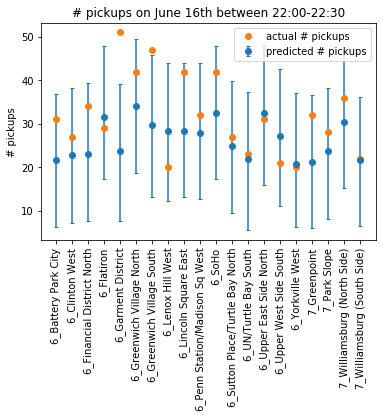

In [68]:
x2 = (x[inds])[-40:-20]
yhat2 = (yhat[inds])[-40:-20]
yhat_upper2 = (yhat_upper[inds])[-40:-20]
yhat_lower2 = (yhat_lower[inds])[-40:-20]
y2 = (y[inds])[-40:-20]
yhat_err2 = np.stack([np.array(yhat_lower2),np.array(yhat_upper2)])

plt.xticks(rotation='vertical')
plt.errorbar(x2,yhat2,yerr=yhat_err2,fmt='o')
plt.plot(x2,y2,'o')
plt.ylabel('# pickups')
plt.legend(['actual # pickups','predicted # pickups'])
plt.title('# pickups on June 16th between 22:00-22:30')
plt.show()

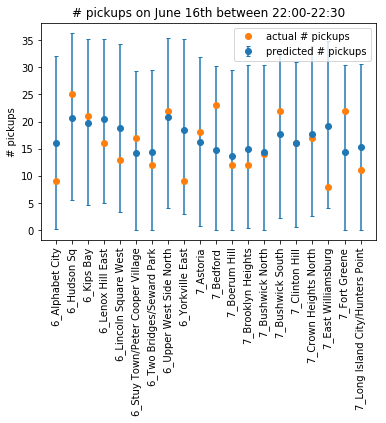

In [70]:
x3 = (x[inds])[-60:-40]
yhat3 = (yhat[inds])[-60:-40]
yhat_upper3 = (yhat_upper[inds])[-60:-40]
yhat_lower3 = (yhat_lower[inds])[-60:-40]
y3 = (y[inds])[-60:-40]
yhat_err3 = np.stack([np.array(yhat_lower3),np.array(yhat_upper3)])

plt.xticks(rotation='vertical')
plt.errorbar(x3,yhat3,yerr=yhat_err3,fmt='o')
plt.plot(x3,y3,'o')
plt.ylabel('# pickups')
plt.legend(['actual # pickups','predicted # pickups'])
plt.title('# pickups on June 16th between 22:00-22:30')
plt.show()

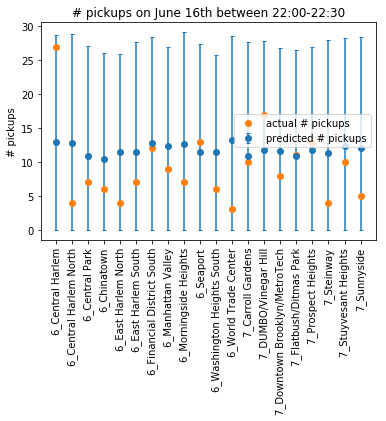

In [71]:
x4 = (x[inds])[-80:-60]
yhat4 = (yhat[inds])[-80:-60]
yhat_upper4 = (yhat_upper[inds])[-80:-60]
yhat_lower4 = (yhat_lower[inds])[-80:-60]
y4 = (y[inds])[-80:-60]
yhat_err4 = np.stack([np.array(yhat_lower4),np.array(yhat_upper4)])

plt.xticks(rotation='vertical')
plt.errorbar(x4,yhat4,yerr=yhat_err4,fmt='o')
plt.plot(x4,y4,'o')
plt.ylabel('# pickups')
plt.legend(['actual # pickups','predicted # pickups'])
plt.title('# pickups on June 16th between 22:00-22:30')
plt.show()

In [28]:
p = forecast.loc[forecast['6_Lower East Side'] != 0.0]
o = original.loc[original['6_Lower East Side'] != 0]
p

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,6_Alphabet City,6_Alphabet City_lower,6_Alphabet City_upper,6_Battery Park,...,seasonalities,seasonalities_lower,seasonalities_upper,snow,snow_lower,snow_upper,weekly,weekly_lower,weekly_upper,yhat
47,2015-06-01 00:14:00,7.080075,7.080075,7.080075,15.105240,44.343483,0.0,0.0,0.0,0.0,...,-0.578800,-0.578800,-0.578800,-0.017988,-0.017988,-0.017988,-2.059371,-2.059371,-2.059371,29.351264
248,2015-06-01 00:54:00,7.080246,7.080246,7.080246,12.458277,42.463201,0.0,0.0,0.0,0.0,...,-2.724997,-2.724997,-2.724997,-0.017988,-0.017988,-0.017988,-2.127954,-2.127954,-2.127954,27.205237
360,2015-06-01 01:18:00,7.080348,7.080348,7.080348,10.251569,41.522600,0.0,0.0,0.0,0.0,...,-4.156151,-4.156151,-4.156151,-0.017988,-0.017988,-0.017988,-2.166834,-2.166834,-2.166834,25.822590
541,2015-06-01 01:58:00,7.080519,7.080519,7.080519,8.917977,38.150918,0.0,0.0,0.0,0.0,...,-6.614736,-6.614736,-6.614736,-0.017988,-0.017988,-0.017988,-2.227787,-2.227787,-2.227787,23.364176
661,2015-06-01 02:29:00,7.080651,7.080651,7.080651,5.868639,35.853897,0.0,0.0,0.0,0.0,...,-8.403506,-8.403506,-8.403506,-0.017988,-0.017988,-0.017988,-2.271675,-2.271675,-2.271675,21.586508
738,2015-06-01 02:52:00,7.080749,7.080749,7.080749,5.822480,34.798610,0.0,0.0,0.0,0.0,...,-9.554041,-9.554041,-9.554041,-0.017988,-0.017988,-0.017988,-2.302325,-2.302325,-2.302325,20.436071
835,2015-06-01 03:22:00,7.080877,7.080877,7.080877,4.995614,34.526658,0.0,0.0,0.0,0.0,...,-10.709764,-10.709764,-10.709764,-0.017988,-0.017988,-0.017988,-2.339840,-2.339840,-2.339840,19.258652
883,2015-06-01 03:34:00,7.080928,7.080928,7.080928,3.062047,33.202635,0.0,0.0,0.0,0.0,...,-11.038779,-11.038779,-11.038779,-0.017988,-0.017988,-0.017988,-2.354061,-2.354061,-2.354061,18.929688
1063,2015-06-01 04:21:00,7.081128,7.081128,7.081128,3.396701,33.396602,0.0,0.0,0.0,0.0,...,-11.488912,-11.488912,-11.488912,-0.017988,-0.017988,-0.017988,-2.405428,-2.405428,-2.405428,18.479405
1182,2015-06-01 04:45:00,7.081231,7.081231,7.081231,4.575207,34.356135,0.0,0.0,0.0,0.0,...,-11.196522,-11.196522,-11.196522,-0.017988,-0.017988,-0.017988,-2.428990,-2.428990,-2.428990,18.771898


In [29]:
o

,ds,y,7_Allerton/Pelham Gardens,7_Bedford Park,7_Belmont,7_Bronx Park,7_Bronxdale,7_City Island,7_Claremont/Bathgate,7_Co-Op City,...,7_West Brighton,7_Westerleigh,Temperature,Humidity,Pressure,snow,Wind Direction,Wind Speed,rain,Holiday
47,2015-06-01 00:14:00,15,0,0,0,0,0,0,0,0,...,0,0,292.36,83,1016,0,120,6,3,0
248,2015-06-01 00:54:00,8,0,0,0,0,0,0,0,0,...,0,0,292.36,83,1016,0,120,6,3,0
360,2015-06-01 01:18:00,8,0,0,0,0,0,0,0,0,...,0,0,290.77,88,1017,0,40,6,3,0
541,2015-06-01 01:58:00,3,0,0,0,0,0,0,0,0,...,0,0,290.77,88,1017,0,40,6,3,0
661,2015-06-01 02:29:00,12,0,0,0,0,0,0,0,0,...,0,0,289.74,88,1019,0,50,9,3,0
738,2015-06-01 02:52:00,6,0,0,0,0,0,0,0,0,...,0,0,289.74,88,1019,0,50,9,3,0
835,2015-06-01 03:22:00,6,0,0,0,0,0,0,0,0,...,0,0,288.97,93,1020,0,50,9,3,0
883,2015-06-01 03:34:00,5,0,0,0,0,0,0,0,0,...,0,0,288.97,93,1020,0,50,9,3,0
1063,2015-06-01 04:21:00,5,0,0,0,0,0,0,0,0,...,0,0,288.54,93,1020,0,40,8,3,0
1182,2015-06-01 04:45:00,9,0,0,0,0,0,0,0,0,...,0,0,288.54,93,1020,0,40,8,3,0


In [45]:
o.loc[:51500]

,ds,y,7_Allerton/Pelham Gardens,7_Bedford Park,7_Belmont,7_Bronx Park,7_Bronxdale,7_City Island,7_Claremont/Bathgate,7_Co-Op City,...,7_West Brighton,7_Westerleigh,Temperature,Humidity,Pressure,snow,Wind Direction,Wind Speed,rain,Holiday
47,2015-06-01 00:14:00,15,0,0,0,0,0,0,0,0,...,0,0,292.360,83,1016,0,120,6,3,0
248,2015-06-01 00:54:00,8,0,0,0,0,0,0,0,0,...,0,0,292.360,83,1016,0,120,6,3,0
360,2015-06-01 01:18:00,8,0,0,0,0,0,0,0,0,...,0,0,290.770,88,1017,0,40,6,3,0
541,2015-06-01 01:58:00,3,0,0,0,0,0,0,0,0,...,0,0,290.770,88,1017,0,40,6,3,0
661,2015-06-01 02:29:00,12,0,0,0,0,0,0,0,0,...,0,0,289.740,88,1019,0,50,9,3,0
738,2015-06-01 02:52:00,6,0,0,0,0,0,0,0,0,...,0,0,289.740,88,1019,0,50,9,3,0
835,2015-06-01 03:22:00,6,0,0,0,0,0,0,0,0,...,0,0,288.970,93,1020,0,50,9,3,0
883,2015-06-01 03:34:00,5,0,0,0,0,0,0,0,0,...,0,0,288.970,93,1020,0,50,9,3,0
1063,2015-06-01 04:21:00,5,0,0,0,0,0,0,0,0,...,0,0,288.540,93,1020,0,40,8,3,0
1182,2015-06-01 04:45:00,9,0,0,0,0,0,0,0,0,...,0,0,288.540,93,1020,0,40,8,3,0


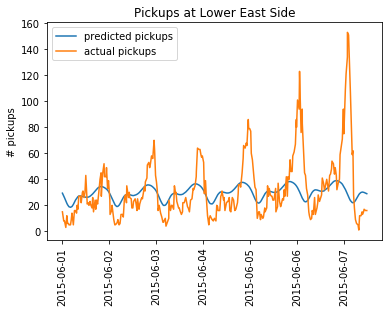

In [51]:
o = o.loc[:51500]
p = p.loc[:51500]

plt.plot(o['ds'],p['yhat'])
plt.plot(o['ds'],o['y'])
plt.xticks(rotation='vertical')
plt.ylabel('# pickups')
plt.legend(['predicted pickups','actual pickups'])
plt.title('Pickups at Lower East Side')
plt.show()

In [72]:
spec_date_les = spec_date.loc[spec_date['6_Lower East Side'] != 0.0]
spec_date_les_og = spec_date_og.loc[spec_date_og['6_Lower East Side'] != 0]
spec_date_les

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,6_Alphabet City,6_Alphabet City_lower,6_Alphabet City_upper,6_Battery Park,...,seasonalities,seasonalities_lower,seasonalities_upper,snow,snow_lower,snow_upper,weekly,weekly_lower,weekly_upper,yhat
119749,2015-06-16 00:07:00,7.172150,3.200613,11.219153,14.823401,44.427565,0.0,0.0,0.0,0.0,...,-0.075473,-0.075473,-0.075473,-0.017988,-0.017988,-0.017988,-1.879715,-1.879715,-1.879715,30.018232
119947,2015-06-16 00:48:00,7.172325,3.191832,11.231110,12.500138,43.634153,0.0,0.0,0.0,0.0,...,-2.092312,-2.092312,-2.092312,-0.017988,-0.017988,-0.017988,-1.829134,-1.829134,-1.829134,28.001567
120104,2015-06-16 01:22:00,7.172470,3.184550,11.234978,10.031887,41.358113,0.0,0.0,0.0,0.0,...,-4.015141,-4.015141,-4.015141,-0.017988,-0.017988,-0.017988,-1.787322,-1.787322,-1.787322,25.797994
120252,2015-06-16 01:59:00,7.172627,3.173685,11.239188,8.783477,39.549638,0.0,0.0,0.0,0.0,...,-6.188029,-6.188029,-6.188029,-0.017988,-0.017988,-0.017988,-1.742100,-1.742100,-1.742100,23.625263
120357,2015-06-16 02:26:00,7.172742,3.163388,11.242409,7.126690,37.660838,0.0,0.0,0.0,0.0,...,-7.682072,-7.682072,-7.682072,-0.017988,-0.017988,-0.017988,-1.709360,-1.709360,-1.709360,22.240627
120446,2015-06-16 02:52:00,7.172853,3.153472,11.255745,5.638961,35.693400,0.0,0.0,0.0,0.0,...,-8.929811,-8.929811,-8.929811,-0.017988,-0.017988,-0.017988,-1.678096,-1.678096,-1.678096,20.992999
120557,2015-06-16 03:22:00,7.172981,3.145807,11.271134,4.449123,34.798553,0.0,0.0,0.0,0.0,...,-10.012323,-10.012323,-10.012323,-0.017988,-0.017988,-0.017988,-1.642399,-1.642399,-1.642399,20.096911
120575,2015-06-16 03:30:00,7.173015,3.143868,11.275237,4.049306,35.020179,0.0,0.0,0.0,0.0,...,-10.221864,-10.221864,-10.221864,-0.017988,-0.017988,-0.017988,-1.632956,-1.632956,-1.632956,19.887404
120751,2015-06-16 04:24:00,7.173246,3.122488,11.302937,3.881082,34.291920,0.0,0.0,0.0,0.0,...,-10.632836,-10.632836,-10.632836,-0.017988,-0.017988,-0.017988,-1.570171,-1.570171,-1.570171,19.405143
120830,2015-06-16 04:42:00,7.173322,3.114202,11.312170,5.023009,35.427866,0.0,0.0,0.0,0.0,...,-10.374887,-10.374887,-10.374887,-0.017988,-0.017988,-0.017988,-1.549649,-1.549649,-1.549649,19.663169


In [73]:
spec_date_les_og

,ds,y,7_Allerton/Pelham Gardens,7_Bedford Park,7_Belmont,7_Bronx Park,7_Bronxdale,7_City Island,7_Claremont/Bathgate,7_Co-Op City,...,7_West Brighton,7_Westerleigh,Temperature,Humidity,Pressure,snow,Wind Direction,Wind Speed,rain,Holiday
119749,2015-06-16 00:07:00,19,0,0,0,0,0,0,0,0,...,0,0,293.39,100,1014,0,40,5,4,0
119947,2015-06-16 00:48:00,17,0,0,0,0,0,0,0,0,...,0,0,293.39,100,1014,0,40,5,4,0
120100,2015-06-16 01:22:00,8,0,0,0,0,0,0,0,0,...,0,0,292.99,94,1012,0,47,2,0,0
120252,2015-06-16 01:59:00,5,0,0,0,0,0,0,0,0,...,0,0,292.99,94,1012,0,47,2,0,0
120357,2015-06-16 02:26:00,6,0,0,0,0,0,0,0,0,...,0,0,292.42,88,1015,0,100,2,2,0
120446,2015-06-16 02:52:00,4,0,0,0,0,0,0,0,0,...,0,0,292.42,88,1015,0,100,2,2,0
120557,2015-06-16 03:22:00,9,0,0,0,0,0,0,0,0,...,0,0,292.00,88,1015,0,60,4,4,0
120573,2015-06-16 03:30:00,4,0,0,0,0,0,0,0,0,...,0,0,292.00,88,1015,0,60,4,4,0
120751,2015-06-16 04:24:00,4,0,0,0,0,0,0,0,0,...,0,0,291.87,93,1016,0,100,2,4,0
120830,2015-06-16 04:42:00,9,0,0,0,0,0,0,0,0,...,0,0,291.87,93,1016,0,100,2,4,0


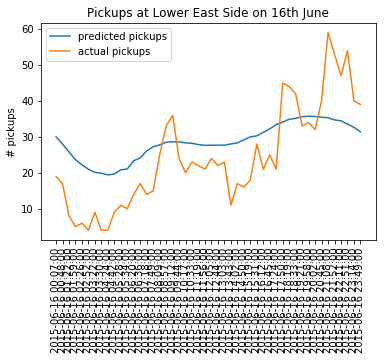

In [76]:
plt.plot(spec_date_les['ds'],spec_date_les['yhat'])
plt.plot(spec_date_les['ds'],spec_date_les_og['y'])
plt.xticks(rotation='vertical')
plt.ylabel('# pickups')
plt.legend(['predicted pickups','actual pickups'])
plt.title('Pickups at Lower East Side on 16th June')
plt.show()

[(1, 1), (2, 1), (1, 2)]


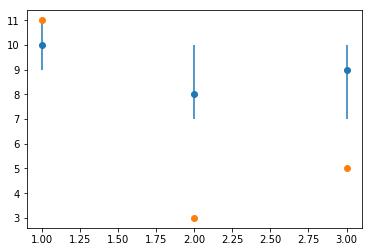

In [54]:
#TEST


x = [1,2,3]
y = [10,8,9]
y1 = [11,3,5]
y2 = [1,2,1]
y3 = [1,1,2]

print(list(zip(y2, y3)))

plt.errorbar(x,y,yerr=np.stack([y3,y2]),fmt='o')
plt.plot(x,y1,'o')
plt.show()